## Introduction
First we need to import the necessary libraries to use for this lab. We'll be using [`numpy`](http://www.numpy.org/) for linear algebra operations, [`matplotlib`](https://matplotlib.org/) for plotting, [`scipy`](https://docs.scipy.org/doc/scipy/reference/) for scientific and numerical computations, and [`tensorflow`](https://www.tensorflow.org/) for computing the neural networks. We collaborated using our [github repository](https://github.com/CoeWorl/ML-Lab-04) where all the code and datasets are located, and instructions to install necessary libraries at Andrew Ng's [github repository](https://github.com/dibgerge/ml-coursera-python-assignments) and the instructions to install the [tensorflow](https://www.tensorflow.org/install) library.

#### Importing the data
Using pandas to create the dataframe and creating the arrays for the data.

In [31]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library#
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize

# Computing neural network layers
import tensorflow as tf

# Parsing the .tsv/.csv files
import pandas as pd

#scikit learn
from sklearn.model_selection import train_test_split

#keras imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score

#sklearn for confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Creating the heatmap of confusion matrix
import seaborn as sns



#### Separating the Data 
Creating the X matrix with all of the features and their values and the y vector that gives the classification.

In [32]:
df = pd.read_csv('localify_music_genre - song_dataset_short_limited.csv')

#Testing to see what the dataframe looks like
#print(df.head()) #to test the dataframe

X, y = df.iloc[:, 2:10], df.iloc[:, 12]


In [33]:
df.head()

,song_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_name,Unnamed: 12
0,All Mixed Up,311,0.010400,0.760,0.702,0.00000,0.380,-9.404,0.0716,92.323998,0.659,alternative,0
1,Don't Tread On Me,311,0.000045,0.574,0.919,0.00280,0.116,-6.418,0.0737,176.531998,0.704,alternative,0
2,Beautiful Disaster,311,0.000387,0.576,0.738,0.00131,0.130,-8.122,0.0353,168.132004,0.675,alternative,0
3,Backfired,408,0.076700,0.496,0.937,0.00000,0.123,-2.628,0.1320,178.020996,0.182,punk,8
4,Manic,408,0.001370,0.436,0.980,0.00000,0.638,-3.491,0.2220,200.097000,0.674,punk,8


#### Separating the Training and Cross Validation Data
Taking all the songs and dividing them into the training set and the cross validation set. 8000 songs will be a part of the training set, and 2000 songs will be a part of the cross validation set.

In [34]:

import random

#create df for training
trainData = df.copy()

#calculate length of validation df
lenValidation = len(df)*0.2

#create empty df for validation
validationData = df.iloc[0:0]

#run until validationData is 20% of original df
while len(validationData) != int(lenValidation):
    #find random index from df
    randomIndex = random.randint(0,len(trainData)-1)
    #get row at index
    row = trainData.iloc[randomIndex]
    #extract artist name
    artist_name = row['artist_name']
    #extract all indices with that artist name
    artist_rows = trainData[trainData['artist_name'] == artist_name]
    #if there is enough space in validationData for them all add to validation
    if(lenValidation-len(validationData) >= len(artist_rows)):
        #add rows to validation df
        validationData = pd.concat([validationData, artist_rows], ignore_index=True)
        #remove validation rows from traindata
        trainData = trainData[trainData['artist_name'] != artist_name]

print(len(trainData))
print(len(validationData))



8000
2000


#### Building the Model

Using TensorFlow and Keras, the model that we use to classify the genre of the songs is built. The result shows the classification accuracy of the training set and the cross validation set, as well as the loss for both sets.

In [35]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Define the deep learning model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

# EarlyStopping callback
earlystopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='best_model_weights2.weights.h5', save_weights_only=True, monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint, earlystopping])



Epoch 1/1000
113/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1311 - loss: 2.3561
Epoch 1: val_accuracy improved from -inf to 0.15320, saving model to best_model_weights2.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1322 - loss: 2.3525 - val_accuracy: 0.1532 - val_loss: 2.3113
Epoch 2/1000
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1795 - loss: 2.2204
Epoch 2: val_accuracy improved from 0.15320 to 0.16960, saving model to best_model_weights2.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1797 - loss: 2.2199 - val_accuracy: 0.1696 - val_loss: 2.2599
Epoch 3/1000
100/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2214 - loss: 2.1538
Epoch 3: val_accuracy did not improve from 0.16960
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2215 - loss: 2.1529 - val_accuracy: 0.1516 - val_loss: 2.4092
Epoch 4/1000
102/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2362 - loss: 2.1010
Epoch 4: val_accuracy improved from 0.16960

#### Creating the Confusion Matrix
Building and showing the confusion matrix.

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


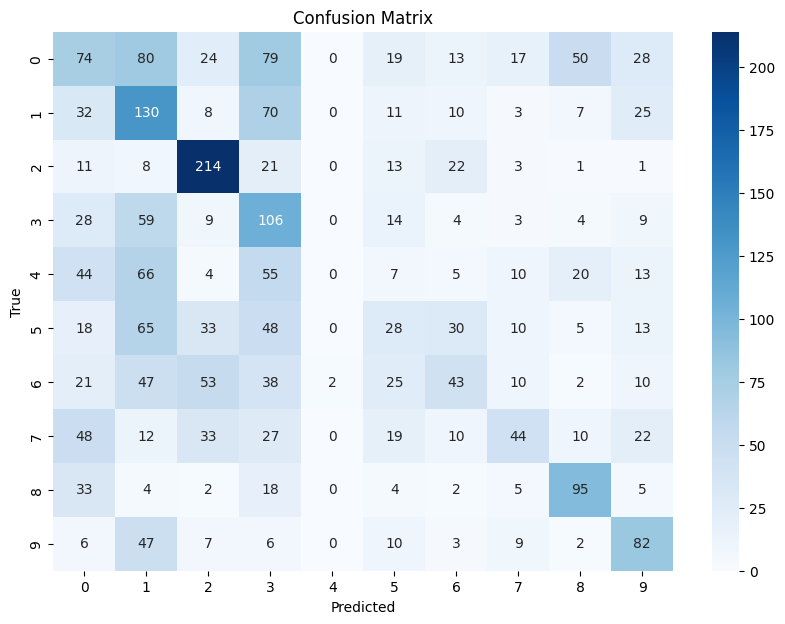

In [36]:
#Creating the confusion matrix
# Step 1: Make predictions on the test data
y_pred_probs = model.predict(X_test)  # This will give you probabilities if using softmax

# Step 2: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))


# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Questions


1. What was the final NN architecture that gave you the best classification accuracy and what was that performance on the validation set?

Sequential - 32.64%

2. Describe the NN architecture in terms of layers, number of hidden nodes in each layer, activation functions, regularization, etc.

Sequential model consisting of 5 layers of size 128, 64, 32, 16, 10. Hidden layers use relu for activation, output layer uses softmax as this is a multicalssification problem. Keras batch regularization is technique used for regularization. Optimizer is Adam, loss is sparse categorical crossentropy. The model utilizes 1000 epochs, but stops training if accuracy does not improve after 50 epochs. Best weights are saved and used for predictions.

3. Print out your confusion matrix with true labels on the left and predicted labels on the top.

4.  Error Analysis: Print out your 5 songs from your test set for which the true label does not match the predicted labels. Listen to these songs and for each reflect on why the predicted label is either a “bad” mistake or kinda a “soft” mistake

5. What was your best classification accuracy using an NN with only one hidden layer network?

31.4%

6. What is classification accuracy on the test set?



In [40]:
#Question 1
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy*100}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32.64%


In [47]:
#Question 4
dfq4 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
dfq4['Correct'] = dfq4['True Label'] == dfq4['Predicted Label']
dfq4.head()

,True Label,Predicted Label,Correct
7661,2,2,True
7862,7,0,False
9778,4,3,False
789,0,8,False
1969,3,1,False


In [46]:
dfq4.to_csv("Question4Analysis.csv", index=False)

In [49]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Define the deep learning model1
model1 = Sequential()
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(10, activation='softmax'))

# EarlyStopping callback
earlystopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# model1Checkpoint callback
checkpoint = ModelCheckpoint(filepath='best_model1_weights2.weights.h5', save_weights_only=True, monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model1
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model1
model1.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint, earlystopping])



Epoch 1/1000
103/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0983 - loss: 2.6030
Epoch 1: val_accuracy improved from -inf to 0.11640, saving model to best_model1_weights2.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1000 - loss: 2.5922 - val_accuracy: 0.1164 - val_loss: 2.4867
Epoch 2/1000
 93/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1433 - loss: 2.3664
Epoch 2: val_accuracy improved from 0.11640 to 0.18280, saving model to best_model1_weights2.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1452 - loss: 2.3582 - val_accuracy: 0.1828 - val_loss: 2.2696
Epoch 3/1000
 99/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1824 - loss: 2.2368
Epoch 3: val_accuracy improved from 0.18280 to 0.22240, saving model to best_model1_weights2.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1838 - loss: 2.2337 - val_accuracy: 0.2224 - val_loss: 2.1744
Epoch 4/1000
100/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2057 - 

In [52]:
#Question 1
y_pred_probs = model1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy*100}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31.480000000000004%
